In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import matplotlib.dates as mdates
import seaborn as sns

In [15]:
BASE = Path("../data/raw")
X_train = pd.read_csv(BASE / "X_train_78VdSWL.csv", index_col=0, parse_dates=True)
y_train = pd.read_csv(BASE / "y_train.csv", index_col=0, parse_dates=True)
y_train2 = pd.read_csv(BASE / "new_output_sample.csv", index_col=0, parse_dates=True)

In [16]:
X_test = pd.read_csv(BASE / "X_test_XKVc4no.csv", index_col=0, parse_dates=True)

In [17]:
holed_cols = [c for c in X_train.columns if c.startswith("holed_")]
clean_cols = [c for c in X_train.columns if c not in holed_cols]
holed_cols_test = [c for c in X_test.columns if c.startswith("holed_")]
clean_cols_test = [c for c in X_test.columns if c not in holed_cols_test]


## Filtre par taux de valeurs manquantes

In [18]:
clean_cols = [c for c in clean_cols if X_train[c].isna().mean() < 0.01]
clean_cols_test = [c for c in clean_cols_test if X_test[c].isna().mean() < 0.01]

In [19]:
missing_ratio = y_train.isna().mean()
threshold = 0.95
cols_to_drop = missing_ratio[missing_ratio >= threshold].index.tolist()
cols_to_keep = missing_ratio[missing_ratio <= threshold].index.tolist()

print(f"Nb de colonnes supprimés : {len(cols_to_drop)}")

Nb de colonnes supprimés : 1


In [20]:
X_train.drop(columns=cols_to_drop, inplace=True)
y_train.drop(columns=cols_to_drop, inplace=True)

In [21]:
X_train = np.log1p(X_train)
X_test = np.log1p(X_test)   
y_train = np.log1p(y_train)

Text(0.5, 1.0, 'Distribution des écarts-types des features')

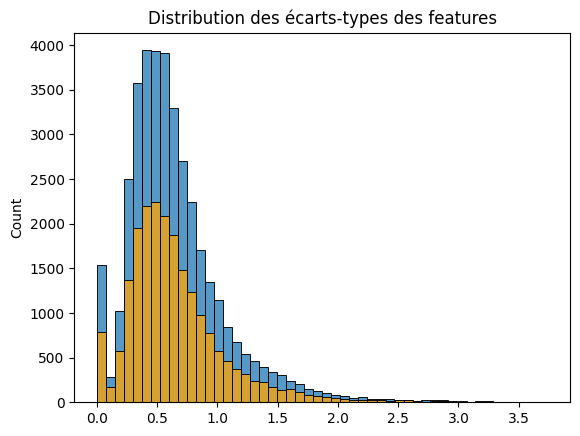

In [22]:
std = X_test.std()
sns.histplot(std, bins=50,label="test")
plt.title("Distribution des écarts-types des features")

std = X_train.std()
sns.histplot(std, bins=50,label="train",color='orange')
plt.title("Distribution des écarts-types des features")


In [23]:
X_train.to_csv("../data/processed/X_train.csv",date_format="%Y-%m-%d %H:%M:%S",index=True)
X_test.to_csv("../data/processed/X_test.csv",date_format="%Y-%m-%d %H:%M:%S",index=True)
y_train.to_csv("../data/processed/y_train.csv",date_format="%Y-%m-%d %H:%M:%S",index=True)
y_train2.to_csv("../data/processed/y_train2.csv",date_format="%Y-%m-%d %H:%M:%S",index=True)
